# Anexo 3: Regresión Lineal

En este notebook se realizará la creación del modelo de Regresión Lineal, siguiendo los pasos definidos en la documentación para la creación de modelos de regresión

In [1]:
import pandas as pd
import numpy as np
import feather
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as mpl
mpl.use('nbAgg')
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [2]:
pingfInfoFilePath = './data/dv_personas_190411_abt'
dv_personas_190411_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,M,Acceso a Segundo Ciclo,Ninguno,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Título Universitario,Ninguno,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creación de variables ficticias

#### Se procede a crear las variables ficticias de las diferentes variables categóricas del dataset

In [3]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [4]:
dv_personas_190411_model_one_hot = pd.get_dummies(data=dv_personas_190411_model,columns=categoricalCols)

In [5]:
dv_personas_190411_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,24,21.0,2d2f9c8a7e3c780fef578a2be45f60d537480aeaf01a88...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,32,78.0,0b7cafeb91821d6c39ccc2f3058edd9c77f351f0047f1a...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [6]:
dv_personas_190411_model_one_hot.drop(['dni'],axis=1,inplace = True)

In [8]:
dv_personas_190411_model_one_hot.shape

(14320, 205)

## Modelo de Regresión Lineal con tabla ABT 1

### Escalado de características

In [7]:
dv_personas_190411_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_model_one_hot)
dv_personas_190411_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_model_one_hot_scaler,columns=dv_personas_190411_model_one_hot.columns)
dv_personas_190411_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,Titulacion_is_DIPLOMADO EN TERAPIA OCUPACIONAL,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.000000,0.232323,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.135135,0.282828,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.081081,0.212121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.373737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.297297,0.787879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### División de los datos en características y variable objetivo

In [8]:
Features_1_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_model_one_hot_scaler.iloc[:,2:]
Labels = dv_personas_190411_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [9]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [10]:
Features.shape

(14320, 204)

In [11]:
Labels = np.array(Labels)
Labels[:10]

array([0.23232323, 0.28282828, 0.21212121, 0.37373737, 0.78787879,
       0.2020202 , 0.34343434, 0.77777778, 0.13131313, 0.65656566])

In [12]:
Labels.shape

(14320,)

### División de los datos en datos de prueba y entrenamiento

Se utilizará el 80% de los datos para entrenamiento y el 20% restante para las pruebas

In [13]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features,Labels,test_size=0.20, random_state=42)

In [14]:
x_train.shape

(11456, 204)

In [15]:
x_test.shape

(2864, 204)

### Entrenamiento del modelo

In [16]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [17]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 2.40358551e-01 -6.79761009e-02 -7.61629353e-02  1.24766798e-02
  1.22894042e-02 -5.96882283e-02  3.47082949e-02 -4.27833273e-02
 -5.83067328e-02 -2.27606015e-02  8.71411646e-03 -7.62932172e-02
  2.09540394e-03  1.85564068e-02  1.15311366e-02 -4.74924211e-02
 -6.99500705e-02 -6.13281668e-02  2.09958015e-02 -1.12441144e-01
 -5.91143767e-02 -1.20340802e-01 -5.07283126e-02 -3.16861809e-02
 -1.10184989e-01  9.76587101e-02 -2.76903000e-02 -1.03717039e-01
 -5.54808950e-02  3.09915326e-02 -9.12165380e-02 -1.04489431e-02
  1.28113659e-02 -1.87473294e-02 -1.11267429e-01  7.30611780e-02
 -3.65241330e-02 -1.32319217e-01  4.10204460e-02  1.08355668e-02
 -2.82519011e-02 -5.86573020e-02  1.59010815e-02 -2.58760350e-02
 -5.30549675e-02  1.55706903e-02 -6.12725057e-03 -1.79410906e-02
  1.45344661e-02  5.65714490e-02 -3.55556189e-02  5.00419582e-04
 -2.13966780e-02  8.47974491e-02 -1.06522322e-01 -2.87926530e-03
 -6.89828738e-02 -5.96352753e-02  1.81145831e-03  2.36385275e-02
  3.70156839e-02 -1.1

In [18]:
y_score = lin_mod.predict(x_test) 


### Evaluación del modelo

In [19]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)*1000))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))*100))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)*100))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)*100))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
print_metrics(y_test, y_score, 28) 

Mean Square Error      = 45.16044745121729
Root Mean Square Error = 21.25098761263045
Mean Absolute Error    = 17.10220381447141
Median Absolute Error  = 15.18657183406329
R^2                    = 0.08908433912752178
Adjusted R^2           = 0.0804120109034185


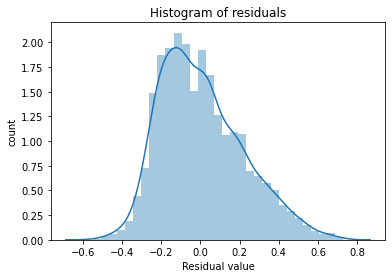

In [20]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

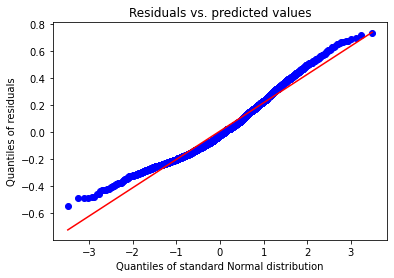

In [21]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(y_test, y_score)   

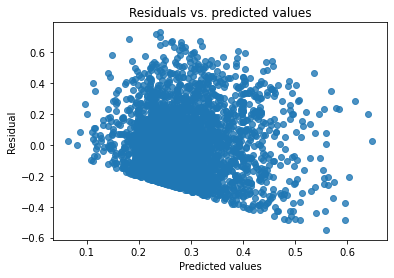

In [22]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

## Modelo de Regresión Lineal con tabla ABT 2

In [23]:
pingfInfoFilePath = './data/dv_personas_190411_abt2'
dv_personas_190411_ordenPr_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_ordenPr_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M,Selectividad,Ninguno,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,4.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,H,Selectividad,Ninguno,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M,Selectividad,Ninguno,22,20.0,401d91e105d4ec88bb787fd80e08da5fa0f906d224588e...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M,Formación Profesional,Ninguno,26,34.0,f3f17dc825855d8494c10db6978218405641a60995aaf8...,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creación de variables ficticias

#### Se procede a crear las variables ficticias de las diferentes variables categóricas del dataset

In [24]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [25]:
dv_personas_190411_ordenPr_model_one_hot = pd.get_dummies(data=dv_personas_190411_ordenPr_model,columns=categoricalCols)

In [26]:
dv_personas_190411_ordenPr_model_one_hot.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,21,23.0,0013670b45b4207d01539bc1d057daa03bab0e2de19916...,1.0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,26,28.0,2ec47253d8c59fa32f000519d2f9b83c26c7f11dcc1ed8...,4.0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,21,37.0,df8a544bdeb3b60dfe3c5ab2abce943b2e8769ca4693ce...,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,22,20.0,401d91e105d4ec88bb787fd80e08da5fa0f906d224588e...,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,26,34.0,f3f17dc825855d8494c10db6978218405641a60995aaf8...,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [27]:
dv_personas_190411_ordenPr_model_one_hot.drop(['dni'],axis=1,inplace = True)

### Escalado de características

In [28]:
dv_personas_190411_ordenPr_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_ordenPr_model_one_hot)
dv_personas_190411_ordenPr_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_ordenPr_model_one_hot_scaler,columns=dv_personas_190411_ordenPr_model_one_hot.columns)
dv_personas_190411_ordenPr_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,tto_pcto_dias_trabajados,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),Titulacion_is_DIPLOMADO EN ENFERMERÍA,...,tipo_acceso_Estudios universitarios extranjeros parcialmente convalidados,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Otros accesos a primer y segundo ciclo,tipo_acceso_Selectividad,tipo_acceso_Traslado de Expediente (Estudios Españoles),tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.000000,0.232323,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.142857,0.282828,0.428571,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.373737,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.028571,0.202020,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.142857,0.343434,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### División de los datos en características y variable objetivo

In [29]:
Features_1_2 = dv_personas_190411_ordenPr_model_one_hot_scaler.iloc[:,0:1]
Features_2_2 = dv_personas_190411_ordenPr_model_one_hot_scaler.iloc[:,2:]
Labels = dv_personas_190411_ordenPr_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [30]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [31]:
Labels = np.array(Labels)
Labels[:10]

array([0.23232323, 0.28282828, 0.37373737, 0.2020202 , 0.34343434,
       0.13131313, 0.41414141, 0.41414141, 0.17171717, 0.13131313])

### División de los datos en datos de prueba y entrenamiento

Se utilizará el 75% de los datos para entrenamiento y el 25% restante para las pruebas

In [32]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features,Labels,test_size=0.25, random_state=42)

### Entrenamiento del modelo

In [33]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 2.35811611e-01 -1.16344335e-02 -7.42918702e-02 -9.01332580e-02
 -3.29402032e-02 -2.83024234e-02 -5.35302634e-02  2.97202218e-02
 -5.85995189e-02 -6.76107999e-02 -5.79828636e-02  1.44468547e-02
 -5.15668246e-02 -2.46050879e-02  2.19607847e-02 -1.01699761e-02
 -1.21073160e-01 -2.92794217e-03 -8.03869394e-02 -6.58081776e-03
 -1.33800212e-01 -6.50404367e-02 -1.10483604e-01 -6.09229130e-02
 -3.20095616e-02 -1.42966724e-01  1.06788999e-01 -2.69094502e-02
 -1.37263212e-01 -1.15252634e-01  1.76601679e-02 -9.64507812e-02
  2.67851047e-02  2.17770398e-02 -9.11925356e-02 -1.03203634e-01
  6.32958544e-02 -9.94349189e-04 -1.12059167e-01  2.67890697e-02
 -1.55752035e-02 -2.34071001e-02 -9.38343537e-02  1.14012325e-02
 -2.62599915e-02 -6.71775088e-02  1.88790474e-02  6.75117150e-03
 -4.04545363e-02  8.07123790e-03  6.11463183e-02 -2.69122314e-02
  1.86887762e-02 -6.92307991e-02  1.30185681e-02 -1.46896757e-01
  3.66518974e-02 -1.14531785e-01 -1.64604359e-01  1.53289712e-02
  7.96871726e-02  7.0

In [34]:
y_score = lin_mod.predict(x_test) 

### Evaluación del modelo

In [35]:
print_metrics(y_test, y_score, 28) 

Mean Square Error      = 37.91352746085604
Root Mean Square Error = 19.4713963189228
Mean Absolute Error    = 15.551469523760812
Median Absolute Error  = 13.376363118489587
R^2                    = 0.0644054315417999
Adjusted R^2           = 0.05327230974877592


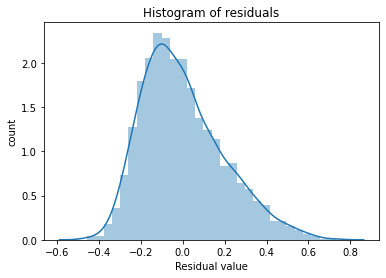

In [36]:
hist_resids(y_test, y_score)   

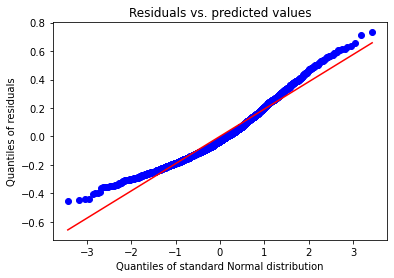

In [37]:
resid_qq(y_test, y_score)   

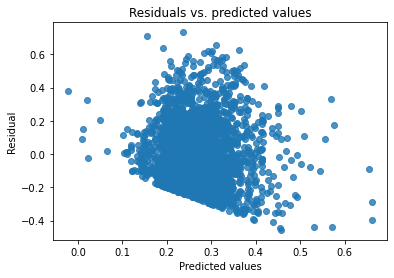

In [38]:
resid_plot(y_test, y_score) 

## Regresión Lineal Tabla ABT 3

In [39]:
pingfInfoFilePath = './data/dv_personas_190411_abt3'
dv_personas_190411_grado_model = pd.read_feather(pingfInfoFilePath,columns=None, use_threads=True)
dv_personas_190411_grado_model.head()

,sexo,tipo_acceso,tipo_erasmus,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),...,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN HUMANIDADES,Titulacion_is_MÁSTER EN GESTIÓN DEL CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA.,Titulacion_is_MÁSTER EN GESTIÓN Y DIRECCIÓN HOSTELERA,Titulacion_is_MÁSTER UNIVERSITARIO EN FORMACIÓN DEL PROFESORADO Y TIC,Titulacion_is_PCEO: DERECHO / ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS / DERECHO,Titulacion_is_PCEO: ADMINISTRACIÓN Y DIRECCIÓN DE EMPRESAS /CIENCIAS DEL TRABAJO,Titulacion_is_MÁSTER UNIVERSITARIO GESTIÓN CONOCIMIENTO BIOMÉDICO E INVESTIGACIÓN CLÍNICA,Titulacion_is_MÁSTER UNIVERSITARIO EN INVESTIGACIÓN EN CIENCIAS SOCIOSANITARIAS,Titulacion_is_MÁSTER UNIVERSITARIO EN PSICOPEDAGOGÍA
0,M,Selectividad,Ninguno,22.0,4,18.0,f2b14b739f4fee6ab445aa8c5f9328afdb15887c85bd6f...,1.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,H,Selectividad,Ninguno,22.0,4,10.0,4901ac26f9604465eb8fda7d12c8a66c17297b6b23f34f...,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M,Selectividad,Ninguno,22.0,4,0.0,02c2aa616e57bf1248b332ecec472b7d6d4d4b66c726af...,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,H,Selectividad,Ninguno,22.0,4,7.0,365bce187da3b4f3e1249f8a23f24c284c00bfe1ffc63f...,1.0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,H,Selectividad,Ninguno,24.0,6,29.0,3665c1e2b4873d0f720ca4adf3902780251952d535674b...,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creación de variables ficticias

#### Se procede a crear las variables ficticias de las diferentes variables categóricas del dataset

In [40]:
categoricalCols = ['sexo','tipo_acceso','tipo_erasmus']

In [41]:
dv_personas_190411_grado_model_one_hot = pd.get_dummies(data=dv_personas_190411_grado_model,columns=categoricalCols)

In [42]:
dv_personas_190411_grado_model_one_hot.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,dni,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,...,sexo_H,sexo_M,tipo_acceso_Acceso a Segundo Ciclo,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Selectividad,tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,22.0,4,18.0,f2b14b739f4fee6ab445aa8c5f9328afdb15887c85bd6f...,1.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,22.0,4,10.0,4901ac26f9604465eb8fda7d12c8a66c17297b6b23f34f...,7.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,22.0,4,0.0,02c2aa616e57bf1248b332ecec472b7d6d4d4b66c726af...,1.0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,22.0,4,7.0,365bce187da3b4f3e1249f8a23f24c284c00bfe1ffc63f...,1.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,24.0,6,29.0,3665c1e2b4873d0f720ca4adf3902780251952d535674b...,3.0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [43]:
dv_personas_190411_grado_model_one_hot.drop(['dni'],axis=1,inplace = True)

In [44]:
dv_personas_190411_grado_model_one_hot.shape

(5218, 197)

In [45]:
dv_personas_190411_grado_model_one_hot.dropna(axis = 0, inplace = True)

In [46]:
dv_personas_190411_grado_model_one_hot.shape

(5218, 197)

### Escalado de características

In [47]:
dv_personas_190411_grado_model_one_hot_scaler = preprocessing.MinMaxScaler().fit_transform(dv_personas_190411_grado_model_one_hot)
dv_personas_190411_grado_model_one_hot_scaler = pd.DataFrame(dv_personas_190411_grado_model_one_hot_scaler,columns=dv_personas_190411_grado_model_one_hot.columns)
dv_personas_190411_grado_model_one_hot_scaler.head()

,edad_fin_primera_titulacion,duracion_studio,tto_pcto_dias_trabajados,orden_preinscripcion,Titulacion_is_GRADO EN EDUCACIÓN PRIMARIA,Titulacion_is_ING. TÉC. OBRAS PÚB. (ESPECIALIDAD EN CONST. CIV.),Titulacion_is_INGENIERO QUÍMICO,Titulacion_is_INGENIERO TÉCNICO FORESTAL (ESPECIALIDAD EN EXPLOTACIONES FORESTALES),Titulacion_is_GRADO EN MEDICINA,Titulacion_is_INGENIERO TÉCNICO INDUSTRIAL (ESPECIALIDAD EN ELECTRICIDAD),...,sexo_H,sexo_M,tipo_acceso_Acceso a Segundo Ciclo,tipo_acceso_Formación Profesional,tipo_acceso_Mayores de 25/40/45 años,tipo_acceso_Selectividad,tipo_acceso_Título Universitario,tipo_erasmus_Estudios,tipo_erasmus_Ninguno,tipo_erasmus_Prácticas
0,0.028571,0.272727,0.185567,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.028571,0.272727,0.103093,0.857143,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.028571,0.272727,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.028571,0.272727,0.072165,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.085714,0.454545,0.298969,0.285714,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### División de los datos en características y variable objetivo

In [48]:
Features_1_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,0:2]
Features_2_2 = dv_personas_190411_grado_model_one_hot_scaler.iloc[:,3:]
Labels = dv_personas_190411_grado_model_one_hot_scaler['tto_pcto_dias_trabajados']

In [49]:
Features = np.array(Features_1_2)
Features = np.concatenate([Features, np.array(Features_2_2)], axis = 1)
Features[:2,:]

array([[0.02857143, 0.27272727, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [50]:
Labels = np.array(Labels)
Labels[:10]

array([0.18556701, 0.10309278, 0.        , 0.07216495, 0.29896907,
       0.04123711, 0.39175258, 0.1443299 , 0.30927835, 0.        ])

In [51]:
Labels.shape

(5218,)

### División de los datos en datos de prueba y entrenamiento

In [52]:
x_train, x_test, y_train, y_test = ms.train_test_split(Features,Labels,test_size=0.1, random_state=42)

### Entrenamiento del modelo

In [53]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [54]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 6.46110736e-02  1.65278693e-01 -1.83305686e-02 -7.57818231e-02
 -2.51393563e-03  6.04833181e-02 -8.20106240e-02 -6.44206893e-02
  1.11674834e-02 -1.34194014e-01 -6.59044781e-02  1.03821569e-01
  7.88114603e-02 -8.38216700e+09  1.46465781e-01  8.62287164e-02
  1.00496111e-01  4.01864004e+08 -2.12416947e-01 -4.05676207e-02
  1.17798108e+09  1.36577243e+09 -5.60613892e-02 -4.11977706e+08
 -7.41030679e+08  3.44361459e-01 -1.40062409e-01 -3.86962915e+08
  1.14980747e-02 -2.23942333e-02  1.24783600e+09  1.32031949e+08
 -8.86983203e-02  1.58281377e-02  4.90160287e+08 -1.19094490e-01
 -1.03288061e-01  9.87850752e-02 -2.30288772e+08 -1.27606729e-01
 -2.27195908e-01 -8.29034619e-02 -9.82681589e-03 -7.55631893e-02
  1.15741242e-01 -1.13400104e+08  4.07239401e+07 -4.34301872e-02
  1.17472303e-02 -1.96643791e+07  2.96938159e+07  1.68346050e-01
 -2.12739456e-02 -4.06869489e+06  1.15009123e-01  2.06499702e-03
  3.55786742e+05  1.42363148e-01 -4.74251369e-02  3.70033473e+06
  1.85478329e-02 -7.4

In [55]:
y_score = lin_mod.predict(x_test) 

### Evaluación del modelo

In [56]:
print_metrics(y_test, y_score, 28)  

Mean Square Error      = 1.015956292165665e+17
Root Mean Square Error = 1007946572.0789297
Mean Absolute Error    = 44116636.62631888
Median Absolute Error  = 11.854509477456173
R^2                    = -3177382246542644.0
Adjusted R^2           = -3351044838965015.5


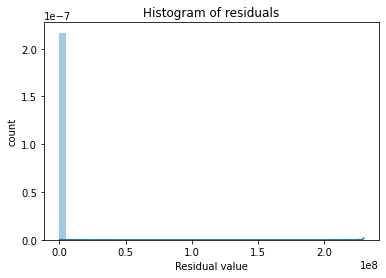

In [57]:
hist_resids(y_test, y_score) 

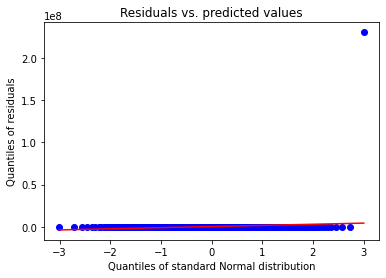

In [58]:
resid_qq(y_test, y_score)   

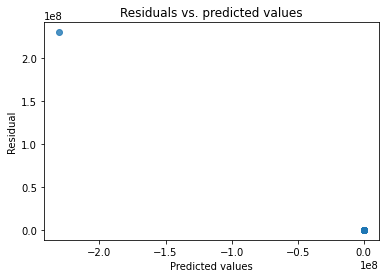

In [59]:
resid_plot(y_test, y_score) 